In [9]:
!pip install yfinance
!pip install pandas
!pip install yfinance
!pip install stocker
!pip install numpy==1.19.3


You should consider upgrading via the 'c:\users\themo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\themo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\themo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\themo\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it beco

In [19]:
micr=get_stock_all('infosys',time='1d').info
print(micr)

NameError: name 'pd' is not defined

In [18]:

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import stocker


RuntimeError: The current Numpy installation ('C:\\Users\\themo\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\numpy\\__init__.py') fails to pass a sanity check due to a bug in the windows runtime. See this issue for more information: https://tinyurl.com/y3dm3h86

In [3]:

class get_stock_all:
    def __init__(self,*name_company,**kwargs):
        if bool(name_company)==True:
            a=name_company
            a1=''.join(a[0])
        else:
            a=input('Enter Company name: ')
            a1=a
        if bool(kwargs)==True:
            time_for_graph=kwargs['time']
        else:
            time_for_graph=input('Enter time period for graphs for eg 5d or 7y etc: ')
          
        a1=a1.replace(" ","%20")
        tgt_website = f'https://finance.yahoo.com/lookup?s={a1}'

        df_list = pd.read_html(tgt_website)
        result_df = df_list[0]
        result_df = result_df.drop(columns=['Industry / Category','Type'])
        if 'sure' in kwargs:
          stock = yf.Ticker(result_df['Symbol'][0])
          stock_price_tomorrow=stocker.predict.tomorrow(result_df['Symbol'][0])
        else:
          print(result_df)
          check_stock=input('Is your stock the top one in the table? If yes then type Y; if not then type the symbol of the stocck from the above table: ')
          if check_stock=='Y' or 'y':
              stock = yf.Ticker(result_df['Symbol'][0])
              stock_price_tomorrow=stocker.predict.tomorrow(result_df['Symbol'][0])
          else:
              stock = yf.Ticker(check_stock)
              stock_price_tomorrow=stocker.predict.tomorrow(check_stock)
        info=stock.info
        info_table=pd.DataFrame.from_dict(info,orient='index')
        self.stock=stock
        self.name=a1
        self.info=stock.info
        self.history=stock.history(period=time_for_graph)
        self.stocklist=result_df
        self.table=info_table
        self.stockpricetomorrow=stock_price_tomorrow
    
    def make_graph(self):
      plt.plot(self.history['Open'])
    @classmethod
    def make_graph_two(cls,name_company1,name_company2,time):
      stock1=cls(name_company1,time=time,sure='True')
      stock2=cls(name_company2,time=time,sure='True')
      # Plot everything by leveraging the very powerful matplotlib package
      plt.plot(stock1.history['Open'],label=stock1.name)
      plt.plot(stock2.history['Open'],label=stock2.name)
      plt.legend()
      plt.show()  
      


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


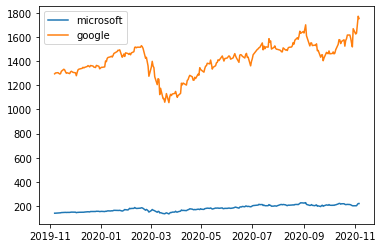

In [ ]:
a=get_stock_all.make_graph_two('microsoft','google','1y')

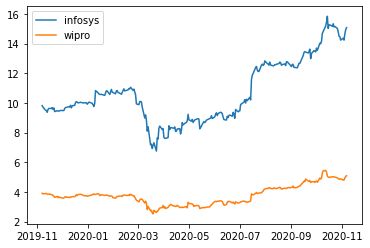

None


In [ ]:
print(get_stock_all.make_graph_two('infosys','wipro','1y'))

In [ ]:
print(get_stock_all('reliance',time='1d').stockpricetomorrow)

              Symbol                             Name  Last Price Exchange
0        RELIANCE.NS                    RELIANCE INDS     2029.15      NSI
1                 RS    Reliance Steel & Aluminum Co.      112.30      NYQ
2        RELIANCE.BO         RELIANCE INDUSTRIES LTD.     2029.00      BSE
3               RELI        RELIANCE GLOBAL GROUP INC        0.08      PNK
4            RIGD.IL  RELIANCE INDUSTRIES LIMITED GDR       55.50      IOB
5               FSRL    FIRST RELIANCE BANCSHARES INC        6.90      PNK
6            RCOM.NS                RELIANCE COMM LTD        1.50      NSI
7   RELIANCEPP-E1.NS                    RELIANCE INDS     1138.40      NSI
8          RPOWER.NS                   RELIANCE POWER        3.10      NSI
9              RLI.F         RELIANCE INDS GDR 144A/2       46.80      FRA
10            RLI.SG  RELIANCE INDUSTRIES LTD. Reg.Eq       46.45      STU
11       RELINFRA.NS               RELIANCE INFRASTRU       19.65      NSI
12     RELCAPITAL.NS     

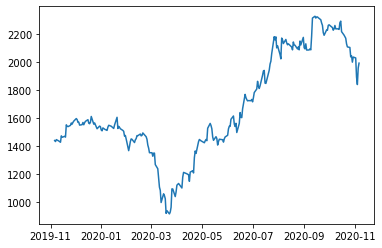

In [ ]:
mic=get_stock_all('RELIANCE INDS',time='1y',sure='True').make_graph()
